# Tensor Decompositions & Decoding

In [1]:
# Import packages

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


###############

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


###############

import tensorly as tl
from tensorly.decomposition import tucker,non_negative_tucker,parafac,non_negative_parafac
from tensorly import tucker_to_tensor
from tensorly.cp_tensor import cp_to_tensor

###############

In [2]:
# Import data & events structure
X=pd.read_pickle('X.pkl')
Y=pd.read_pickle('og_df_Y.pkl')

### Tensor decompositions: PARAFAC Decomposition
http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [3]:
# Reshape structure into a (trial x time x channel) structure & apply algorithm 

n_components=3

X_tensor=tl.tensor(X.values.reshape(477,700,60))

factors_para = parafac(X_tensor ,rank=n_components)
print('PARAFAC output structure: ', factors_para)

PARAFAC output structure:  (weights, factors) : rank-3 CPTensor of shape (477, 700, 60) 


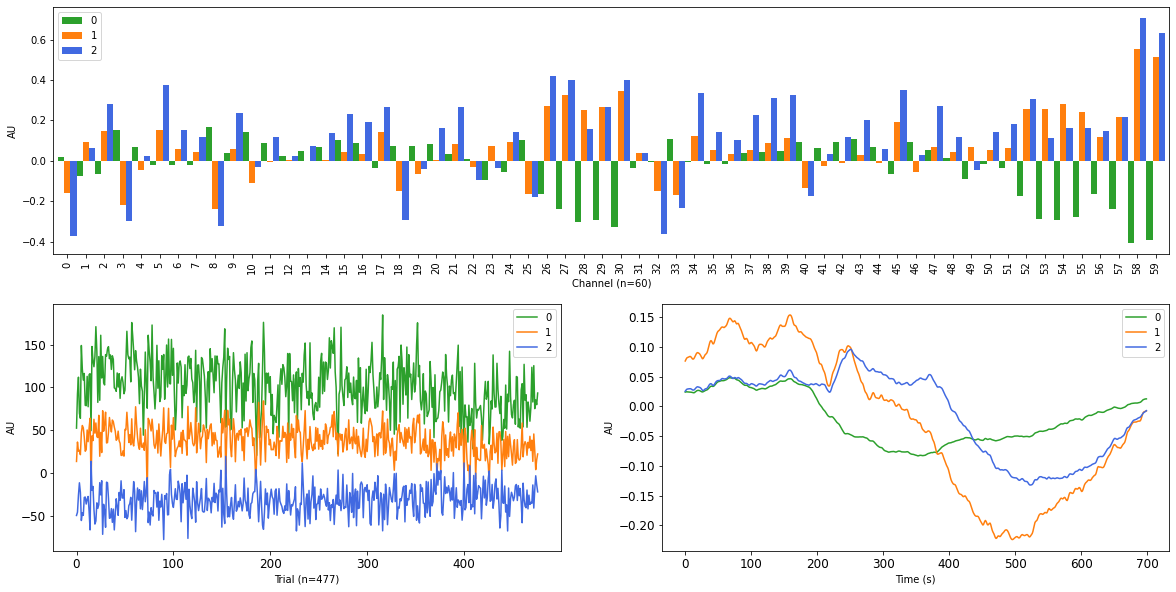

In [4]:
# Plot outputs

pd1 = pd.DataFrame(factors_para[1][0])
pd2 = pd.DataFrame(factors_para[1][1])
pd3 = pd.DataFrame(factors_para[1][2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

Text(-0.999760000000002, 0.5, 'Components')

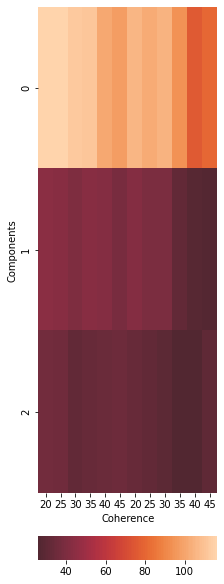

In [7]:
# Plot components across trials

Z = pd1

a = Z.iloc[0:39].abs().mean()
b = Z.iloc[39:79].abs().mean()
c = Z.iloc[79:119].abs().mean()
d = Z.iloc[119:159].abs().mean()
e = Z.iloc[159:199].abs().mean()
f = Z.iloc[199:239].abs().mean()

g = Z.iloc[239:279].abs().mean()
h = Z.iloc[279:319].abs().mean()
i = Z.iloc[319:358].abs().mean()
j = Z.iloc[358:397].abs().mean()
k = Z.iloc[397:437].abs().mean()
l = Z.iloc[437:478].abs().mean()

horizontal_stack = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l], axis=1)
pd1 = horizontal_stack.T

names = ['20', '25', '30', '35', '40', '45', '20', '25', '30', '35', '40', '45']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(3,8), constrained_layout=True)

ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=names)

ax.set_xlabel('Coherence')
ax.set_ylabel('Components')

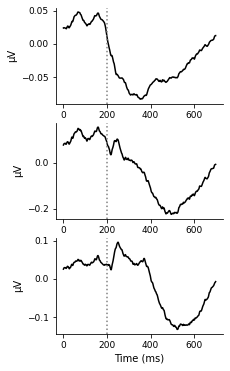

In [8]:
# Plot components across time

%matplotlib inline

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.9997599999999984, 0.5, 'Components')

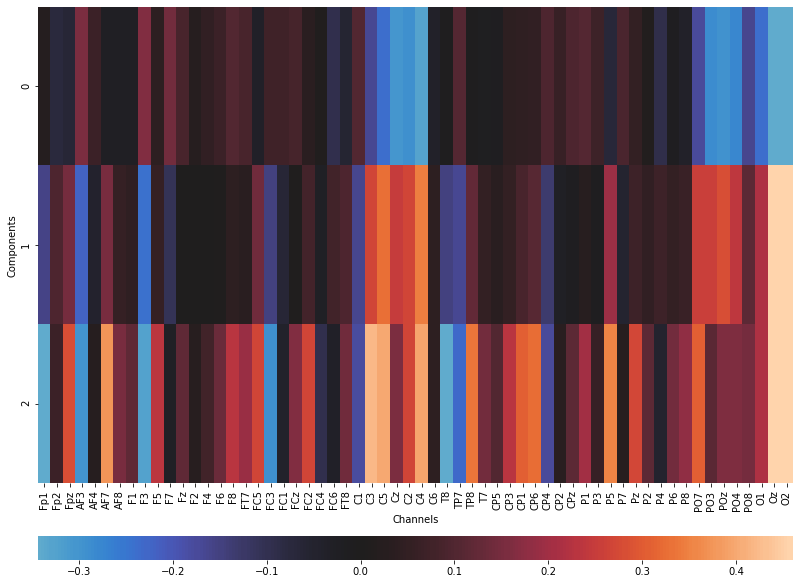

In [9]:
# Plot components across channels

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

## Tensor decompositions: Non-negative-PARAFAC Decomposition

http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [10]:
# Run & apply model

n_components=2

factors_nnpara = non_negative_parafac(X_tensor, rank=n_components)
print('Non-negative-PARAFAC output structure: ', factors_para)

Non-negative-PARAFAC output structure:  (weights, factors) : rank-3 CPTensor of shape (477, 700, 60) 


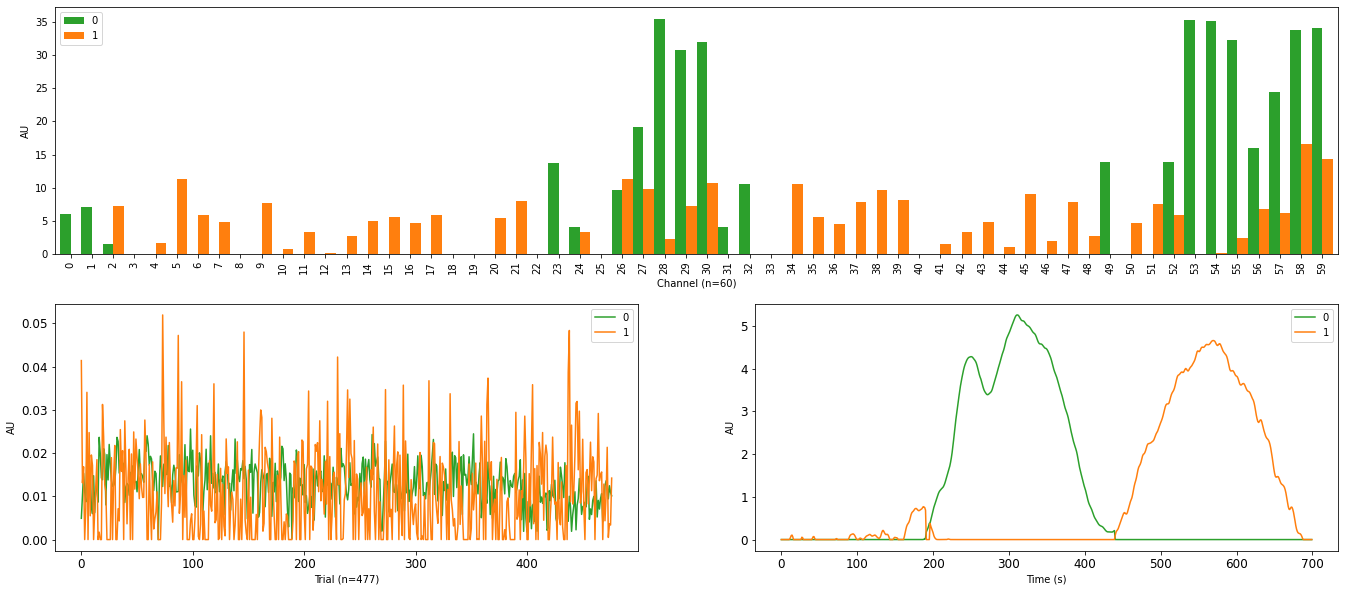

In [11]:
# Plot outputs

pd1 = pd.DataFrame(factors_nnpara[1][0])
pd2 = pd.DataFrame(factors_nnpara[1][1])
pd3 = pd.DataFrame(factors_nnpara[1][2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(23,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

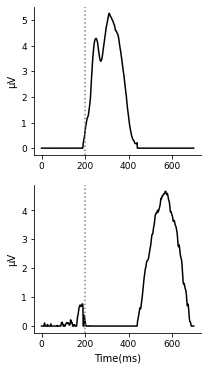

In [12]:
# Plot components across time

fix, ax = plt.subplots(2, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
                 xlabel='Time(ms)',
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

# im = pd2[2].plot(ax=ax[2],
#                  kind='line',  
#             xlabel='Time (ms)', 
#             ylabel='μV', 
#             fontsize=9, 
#             color=['black'])

# im.spines['top'].set_visible(False)
# im.spines['right'].set_visible(False)
# im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.999760000000002, 0.5, 'Components')

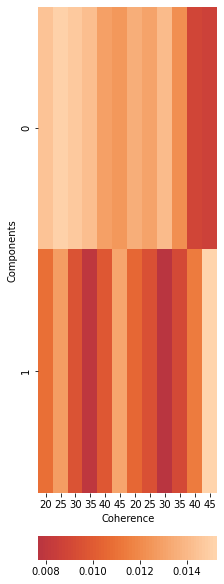

In [13]:
# Plot components across trials

Z = pd1

a = Z.iloc[0:39].abs().mean()
b = Z.iloc[39:79].abs().mean()
c = Z.iloc[79:119].abs().mean()
d = Z.iloc[119:159].abs().mean()
e = Z.iloc[159:199].abs().mean()
f = Z.iloc[199:239].abs().mean()

g = Z.iloc[239:279].abs().mean()
h = Z.iloc[279:319].abs().mean()
i = Z.iloc[319:358].abs().mean()
j = Z.iloc[358:397].abs().mean()
k = Z.iloc[397:437].abs().mean()
l = Z.iloc[437:478].abs().mean()

horizontal_stack = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l], axis=1)
pd1 = horizontal_stack.T

names = ['20', '25', '30', '35', '40', '45', '20', '25', '30', '35', '40', '45']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(3,8), constrained_layout=True)

ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=names)

ax.set_xlabel('Coherence')
ax.set_ylabel('Components')

Text(-0.9997599999999984, 0.5, 'Components')

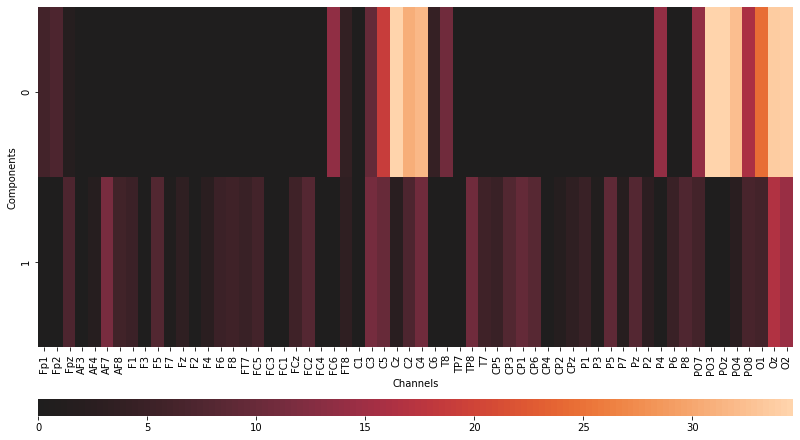

In [14]:
# Plot components across channels

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,6), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

## Tensor decompositions: Tucker decomposition
http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [15]:
# Apply model to tensor

n_components=3

core, factors_tuck = tucker(X_tensor ,rank=[n_components,n_components,n_components])

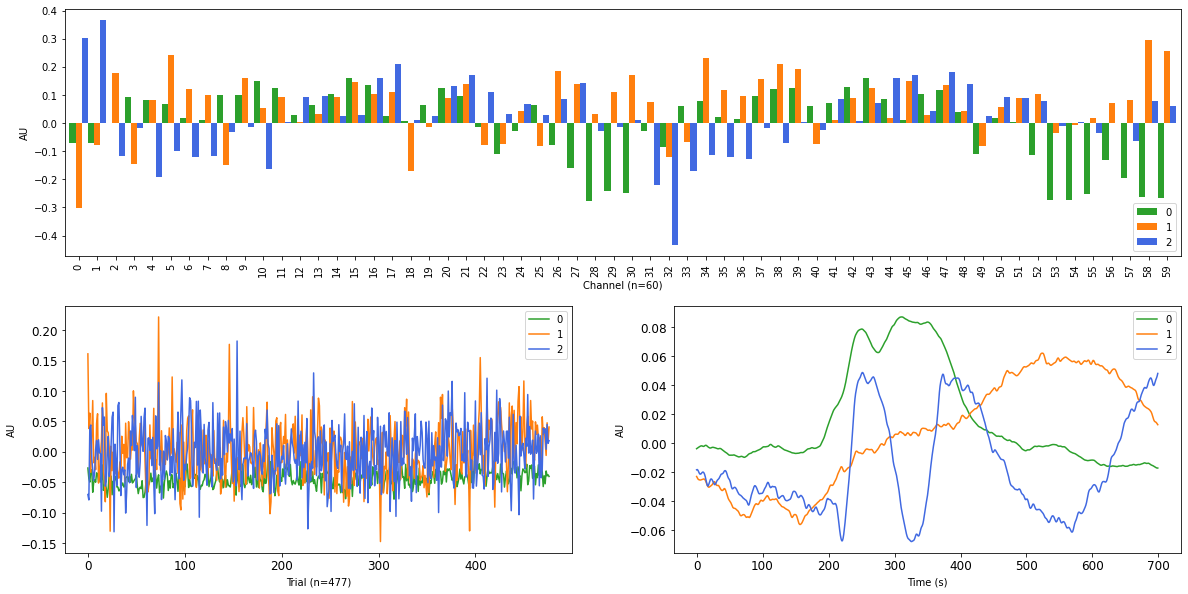

In [16]:
# Plot outputs

pd1 = pd.DataFrame(factors_tuck[0])
pd2 = pd.DataFrame(factors_tuck[1])
pd3 = pd.DataFrame(factors_tuck[2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

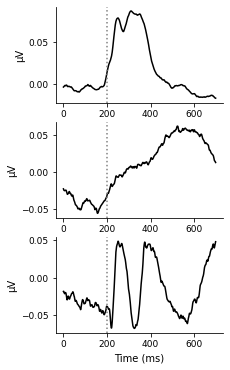

In [17]:
# Plot components across time

fix, ax = plt.subplots(3, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[2].plot(ax=ax[2],
                 kind='line',  
            xlabel='Time (ms)', 
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.999760000000002, 0.5, 'Components')

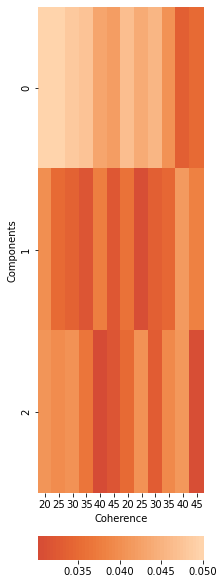

In [18]:
# Plot components across trials

Z = pd1

a = Z.iloc[0:39].abs().mean()
b = Z.iloc[39:79].abs().mean()
c = Z.iloc[79:119].abs().mean()
d = Z.iloc[119:159].abs().mean()
e = Z.iloc[159:199].abs().mean()
f = Z.iloc[199:239].abs().mean()

g = Z.iloc[239:279].abs().mean()
h = Z.iloc[279:319].abs().mean()
i = Z.iloc[319:358].abs().mean()
j = Z.iloc[358:397].abs().mean()
k = Z.iloc[397:437].abs().mean()
l = Z.iloc[437:478].abs().mean()

horizontal_stack = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l], axis=1)
pd1 = horizontal_stack.T

names = ['20', '25', '30', '35', '40', '45', '20', '25', '30', '35', '40', '45']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(3,8), constrained_layout=True)

ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=names)

ax.set_xlabel('Coherence')
ax.set_ylabel('Components')

Text(-0.9997599999999984, 0.5, 'Components')

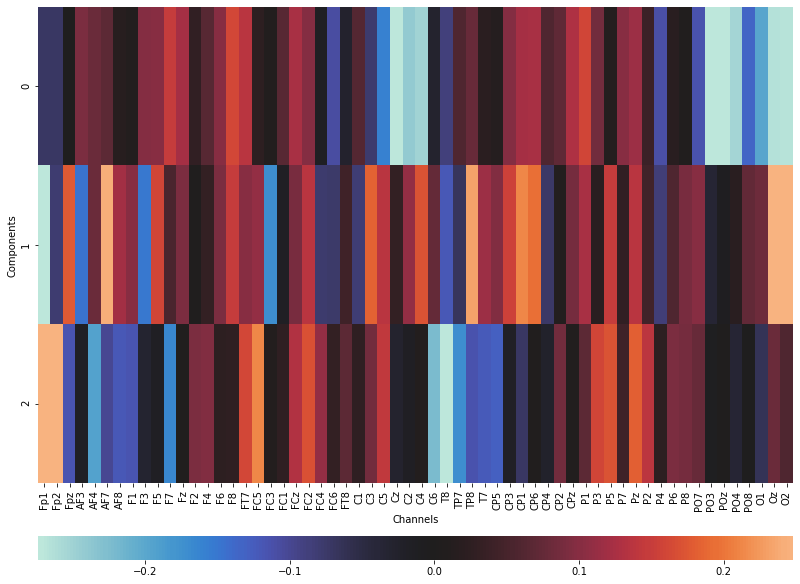

In [19]:
# Plot components across channels

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,8), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

## Tensor decompositions: Non-negative Tucker
http://tensorly.org/stable/user_guide/tensor_decomposition.html

In [20]:
# Apply model

n_components=2

core, factors_nnt = non_negative_tucker(X_tensor ,rank=[n_components,n_components,n_components])

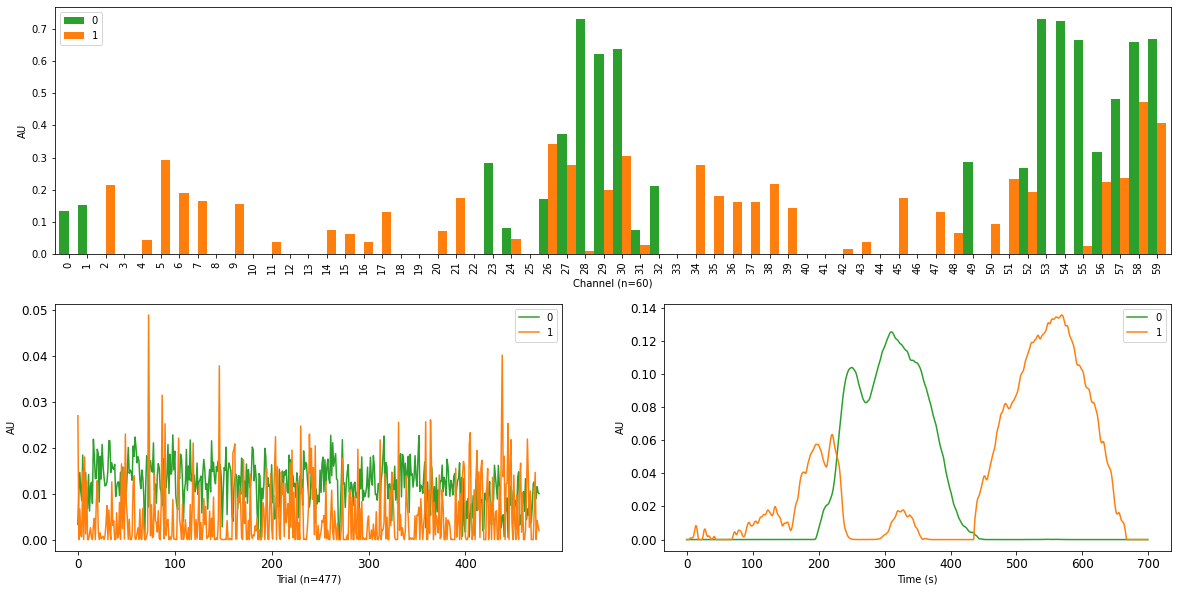

In [21]:
# Plot outputs

pd1 = pd.DataFrame(factors_nnt[0])
pd2 = pd.DataFrame(factors_nnt[1])
pd3 = pd.DataFrame(factors_nnt[2])

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 


pd3.plot(ax=ax1, 
         kind='bar', 
         xlabel='Channel (n=60)', 
         ylabel='AU', 
         color=['tab:green', 'tab:orange', 'royalblue'], 
         width=1)

ax1.set_xticklabels(X.columns)


pd1.plot(ax=ax2,
         kind='line',  
         xlabel='Trial (n=477)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

pd2.plot(ax=ax3,
         kind='line',  
         xlabel='Time (s)', 
         ylabel='AU', 
         fontsize=12, 
         color=['tab:green', 'tab:orange', 'royalblue'])

plt.show();

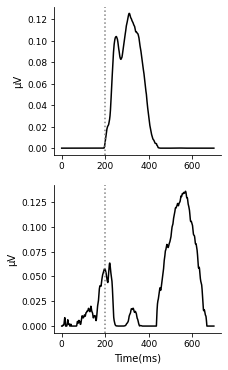

In [22]:
# Plot components across time

fix, ax = plt.subplots(2, 1, figsize=(3,6)) 

im = pd2[0].plot(ax=ax[0],
                 kind='line',   
            ylabel='μV', 
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

im = pd2[1].plot(ax=ax[1],
            kind='line',   
            ylabel='μV', 
                 xlabel='Time(ms)',
            fontsize=9, 
            color=['black'])

im.spines['top'].set_visible(False)
im.spines['right'].set_visible(False)
im.axvline(x=200, linestyle='dotted', color='grey')

# im = pd2[2].plot(ax=ax[2],
#                  kind='line',  
#             xlabel='Time (ms)', 
#             ylabel='μV', 
#             fontsize=9, 
#             color=['black'])

# im.spines['top'].set_visible(False)
# im.spines['right'].set_visible(False)
# im.axvline(x=200, linestyle='dotted', color='grey')

Text(-0.999760000000002, 0.5, 'Components')

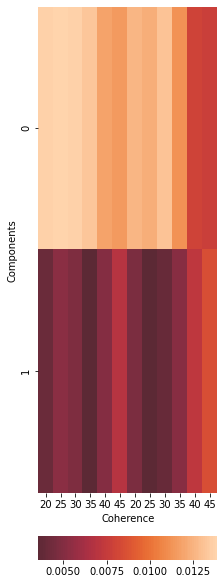

In [23]:
# Plot components across trials

Z = pd1

a = Z.iloc[0:39].abs().mean()
b = Z.iloc[39:79].abs().mean()
c = Z.iloc[79:119].abs().mean()
d = Z.iloc[119:159].abs().mean()
e = Z.iloc[159:199].abs().mean()
f = Z.iloc[199:239].abs().mean()

g = Z.iloc[239:279].abs().mean()
h = Z.iloc[279:319].abs().mean()
i = Z.iloc[319:358].abs().mean()
j = Z.iloc[358:397].abs().mean()
k = Z.iloc[397:437].abs().mean()
l = Z.iloc[437:478].abs().mean()

horizontal_stack = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l], axis=1)
pd1 = horizontal_stack.T

names = ['20', '25', '30', '35', '40', '45', '20', '25', '30', '35', '40', '45']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(3,8), constrained_layout=True)

ax = sns.heatmap(pd1.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=names)

ax.set_xlabel('Coherence')
ax.set_ylabel('Components')

Text(-0.9997599999999984, 0.5, 'Components')

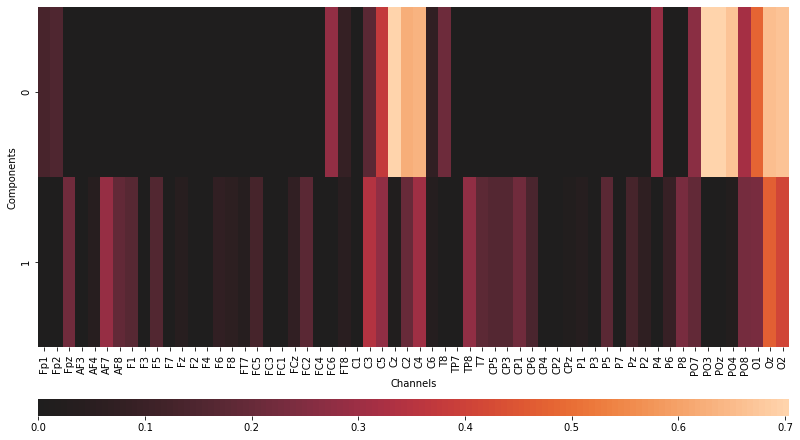

In [24]:
# Plot components across channels

%matplotlib inline

ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2']

grid_kws = {"height_ratios": (1, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(11,6), constrained_layout=True)


ax = sns.heatmap(pd3.T, 
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}, 
                 robust=True, 
                 center=0, 
                 xticklabels=ch_names)

ax.set_xlabel('Channels')
ax.set_ylabel('Components')

## Task Decoding

In [25]:
# Define a function that will train & cross-validate the models capability at determining faces vs cars & plot the results

def face_car_cross_validation(factor, task):

    fig = plt.figure(figsize=(12,12), tight_layout=True)
    gs = gridspec.GridSpec(3, 2, width_ratios=[2,0.5])

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0]) 
    ax3 = fig.add_subplot(gs[2, 0]) 
    ax4 = fig.add_subplot(gs[:, 1])
    ax4.set_box_aspect(aspect=20)

    ######

    X_train, X_test, y_train, y_test = train_test_split(factor,task,train_size=0.85,stratify=task)
    class_names = 'Face', 'Car'

    # ######

    model=LDA()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    LDA_acc_tuck=accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    group_names = ['True',
                   'False',
                   'False',
                   'True']

    group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(conf, 
                ax=ax1, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=labels, 
                fmt='')

    ax1.set_title('Linear discriminant analysis (LDA)')

    print('Single iteration LDA Accuracy score: ', LDA_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    print(sum_stats(conf))

    # ######

    model=GaussianNB()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    GNB_acc_tuck = accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    group_names = ['True',
                   'False',
                   'False',
                   'True']

    group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(conf,
                ax=ax2, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu', 
                square=True,
                annot=labels, 
                fmt='')

    ax2.set_title('Gaussian Naive Bayes')

    print('Single iteration Gaussian Naive Bayes Accuracy score: ', GNB_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    print(sum_stats(conf))

    # ######

    model = KNN()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    KNN_acc_tuck = accuracy_score(y_test,y_pred)

    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    group_names = ['True',
                   'False',
                   'False',
                   'True']

    group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(conf,
                ax=ax3, 
                cbar=True,
                cbar_ax=ax4, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=labels, 
                fmt='')

    ax3.set_title('K-nearest neighbors')

    print('Single iteration K-nearest neighbors Accuracy score: ', KNN_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    print(sum_stats(conf))

    ax1.set_ylabel('True label'); 
    ax2.set_ylabel('True label'); 
    ax3.set_ylabel('True label');

    ax1.set_xlabel('Predicted label');
    ax2.set_xlabel('Predicted label'); 
    ax3.set_xlabel('Predicted label');

    plt.show()

In [26]:
# Define a function that will train & cross-validate the models capability at determining coherence of stimulus presented & plot the results

def difficulty_cross_validation(factor, task):

    fig = plt.figure(figsize=(12,12), tight_layout=True)
    gs = gridspec.GridSpec(3, 2, width_ratios=[2,0.5])

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0]) 
    ax3 = fig.add_subplot(gs[2, 0]) 
    ax4 = fig.add_subplot(gs[:, 1])
    ax4.set_box_aspect(aspect=20)

    ######

    X_train, X_test, y_train, y_test = train_test_split(factor,task,train_size=0.85,stratify=task)
    class_names = '1', '2', '3', '4', '5', '6'

    # ######

    model=LDA()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    LDA_acc_tuck=accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    sns.heatmap(conf, 
                ax=ax1, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=True)

    ax1.set_title('Linear discriminant analysis (LDA)')

    x=1/6
    print('Significance above', "%.2f" % x)

    print('Single iteration LDA Accuracy score: ', "%.2f" % LDA_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

    # ######

    model=GaussianNB()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    GNB_acc_tuck = accuracy_score(y_test,y_pred)
    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    sns.heatmap(conf,
                ax=ax2, 
                cbar=False, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu', 
                square=True,
                annot=True)

    ax2.set_title('Gaussian Naive Bayes')

    print('Single iteration Gaussian Naive Bayes Accuracy score: ' , "%.2f" % GNB_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

    # ######

    model = KNN()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    KNN_acc_tuck = accuracy_score(y_test,y_pred)

    kfold = KFold(n_splits=10, shuffle=True)
    y_pred = cross_val_predict(model, X_test, y_test, cv=kfold)
    results = cross_val_score(model, X_test, y_test, cv=kfold)
    conf = confusion_matrix(y_test,y_pred)

    sns.heatmap(conf,
                ax=ax3, 
                cbar=True,
                cbar_ax=ax4, 
                yticklabels=class_names, 
                xticklabels=class_names, 
                cmap='YlGnBu',
                square=True,
                annot=True)

    ax3.set_title('K-nearest neighbors')

    print('Single iteration K-nearest neighbors Accuracy score: ', "%.2f" % KNN_acc_tuck)
    print("Cross validated score (Mean (Std)): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

    ax1.set_ylabel('True label'); 
    ax2.set_ylabel('True label'); 
    ax3.set_ylabel('True label');

    ax1.set_xlabel('Predicted label');
    ax2.set_xlabel('Predicted label'); 
    ax3.set_xlabel('Predicted label');

    plt.show()

In [27]:
# Define a function that will print the summary statistics

def sum_stats(conf):
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(conf) / float(np.sum(conf))
        precision = conf[1,1] / sum(conf[:,1])
        recall    = conf[1,1] / sum(conf[1,:])
        f1_score  = 2*precision*recall / (precision + recall)
        print('accuracy:', "%.2f" % accuracy, 
              'precision:', "%.2f" % precision,
              'recall:', "%.2f" % recall,
              'f1_score:', "%.2f" % f1_score)

### Decode the tasks using each algorithm + LDA, NBA & KNN classifiers

In [28]:
para = factors_para[1][0]
nnpara = factors_nnpara[1][0]
tuck = factors_tuck[0]
nntuck = factors_nnt[0]

facecar = Y.iloc[:,0]
coherence = Y.iloc[:,1]

Single iteration LDA Accuracy score:  0.6111111111111112
Cross validated score (Mean (Std)): 58.57% (20.40%)
accuracy: 0.60 precision: 0.59 recall: 0.61 f1_score: 0.60
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.5833333333333334
Cross validated score (Mean (Std)): 62.50% (15.57%)
accuracy: 0.58 precision: 0.59 recall: 0.56 f1_score: 0.57
None
Single iteration K-nearest neighbors Accuracy score:  0.625
Cross validated score (Mean (Std)): 63.04% (15.32%)
accuracy: 0.58 precision: 0.59 recall: 0.56 f1_score: 0.57
None


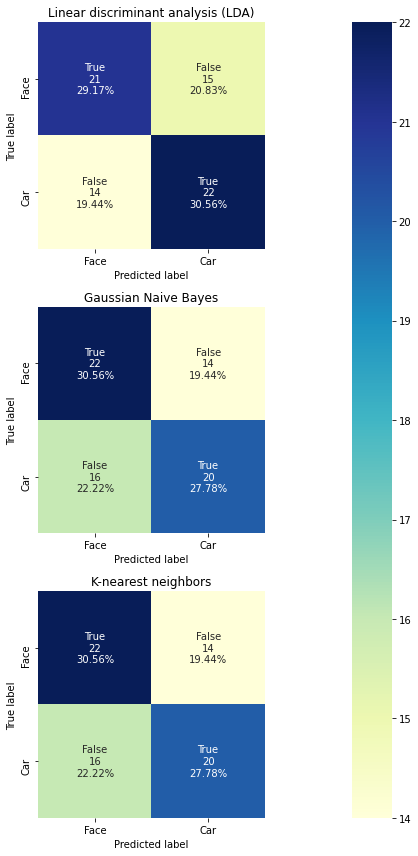

#####
Significance above 0.17
Single iteration LDA Accuracy score:  0.19
Cross validated score (Mean (Std)): 23.75% (11.24%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.12
Cross validated score (Mean (Std)): 17.86% (15.40%)
Single iteration K-nearest neighbors Accuracy score:  0.12
Cross validated score (Mean (Std)): 21.43% (15.65%)


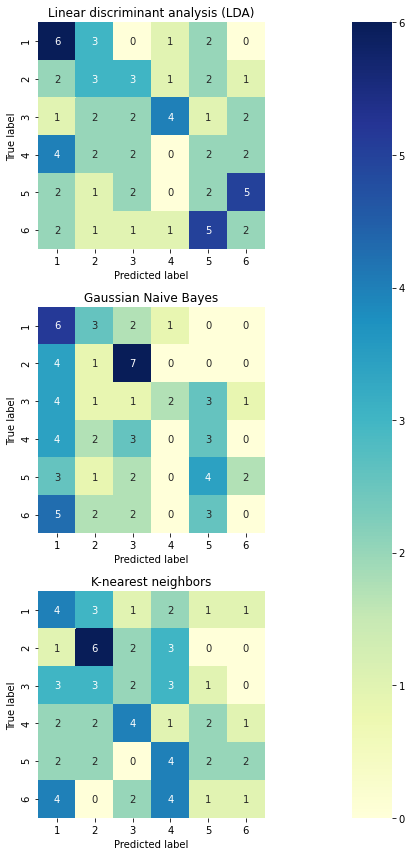

In [32]:
%matplotlib inline

face_car_cross_validation(factor=para, task=facecar)

print("#####")

difficulty_cross_validation(factor=para, task=coherence)

Single iteration LDA Accuracy score:  0.5694444444444444
Cross validated score (Mean (Std)): 63.93% (18.08%)
accuracy: 0.61 precision: 0.60 recall: 0.67 f1_score: 0.63
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.5833333333333334
Cross validated score (Mean (Std)): 59.64% (13.18%)
accuracy: 0.60 precision: 0.59 recall: 0.64 f1_score: 0.61
None
Single iteration K-nearest neighbors Accuracy score:  0.5972222222222222
Cross validated score (Mean (Std)): 50.36% (13.94%)
accuracy: 0.49 precision: 0.48 recall: 0.44 f1_score: 0.46
None


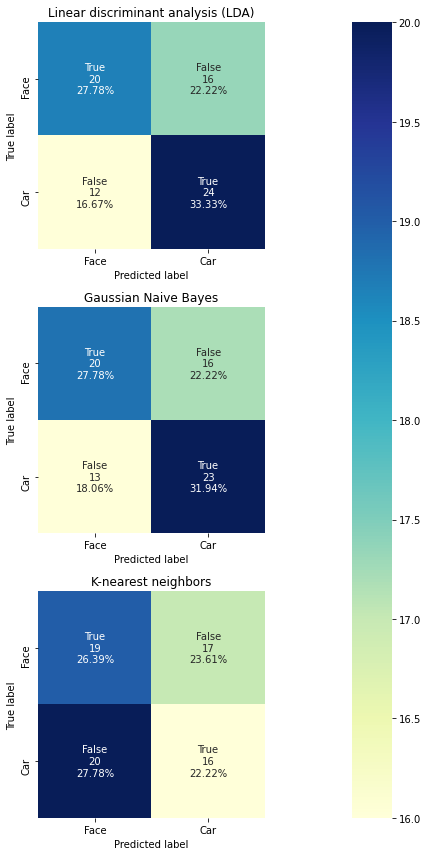

Significance above 0.17
Single iteration LDA Accuracy score:  0.32
Cross validated score (Mean (Std)): 16.61% (12.22%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.29
Cross validated score (Mean (Std)): 25.00% (7.87%)
Single iteration K-nearest neighbors Accuracy score:  0.32
Cross validated score (Mean (Std)): 22.50% (19.55%)


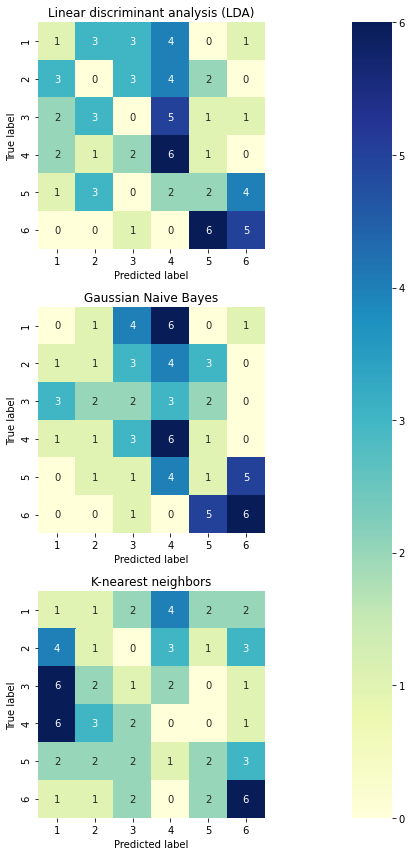

In [34]:
face_car_cross_validation(factor=nnpara, task=facecar)
difficulty_cross_validation(factor=nnpara, task=coherence)

Single iteration LDA Accuracy score:  0.5833333333333334
Cross validated score (Mean (Std)): 52.50% (17.35%)
accuracy: 0.57 precision: 0.56 recall: 0.61 f1_score: 0.59
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.6111111111111112
Cross validated score (Mean (Std)): 53.21% (17.24%)
accuracy: 0.53 precision: 0.52 recall: 0.61 f1_score: 0.56
None
Single iteration K-nearest neighbors Accuracy score:  0.5138888888888888
Cross validated score (Mean (Std)): 51.79% (15.24%)
accuracy: 0.54 precision: 0.53 recall: 0.64 f1_score: 0.58
None


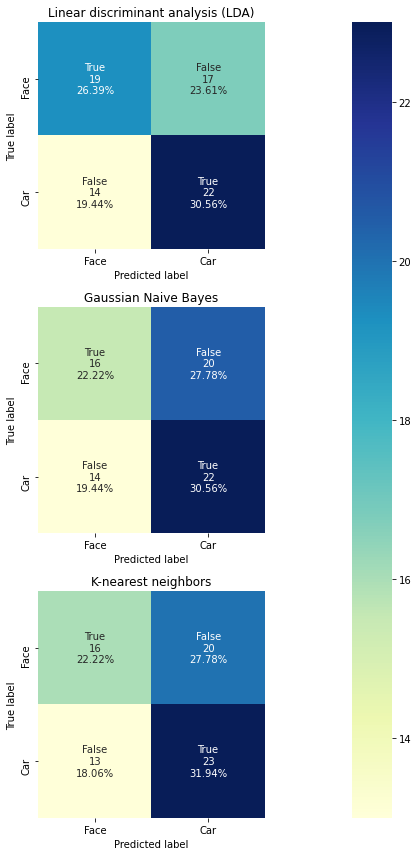

Significance above 0.17
Single iteration LDA Accuracy score:  0.22
Cross validated score (Mean (Std)): 16.61% (13.79%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.24
Cross validated score (Mean (Std)): 19.29% (15.67%)
Single iteration K-nearest neighbors Accuracy score:  0.15
Cross validated score (Mean (Std)): 24.11% (13.01%)


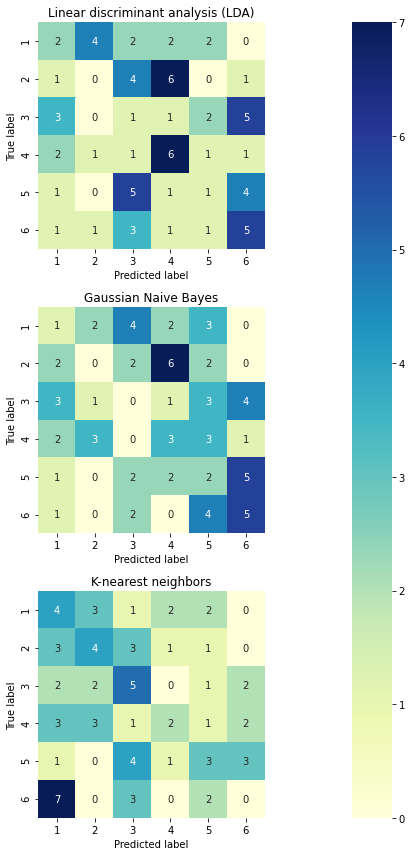

In [35]:
face_car_cross_validation(factor=tuck, task=facecar)
difficulty_cross_validation(factor=tuck, task=coherence)

Single iteration LDA Accuracy score:  0.6111111111111112
Cross validated score (Mean (Std)): 61.25% (18.39%)
accuracy: 0.61 precision: 0.61 recall: 0.64 f1_score: 0.62
None
Single iteration Gaussian Naive Bayes Accuracy score:  0.6388888888888888
Cross validated score (Mean (Std)): 62.32% (15.90%)
accuracy: 0.58 precision: 0.56 recall: 0.75 f1_score: 0.64
None
Single iteration K-nearest neighbors Accuracy score:  0.625
Cross validated score (Mean (Std)): 50.36% (18.66%)
accuracy: 0.50 precision: 0.50 recall: 0.61 f1_score: 0.55
None


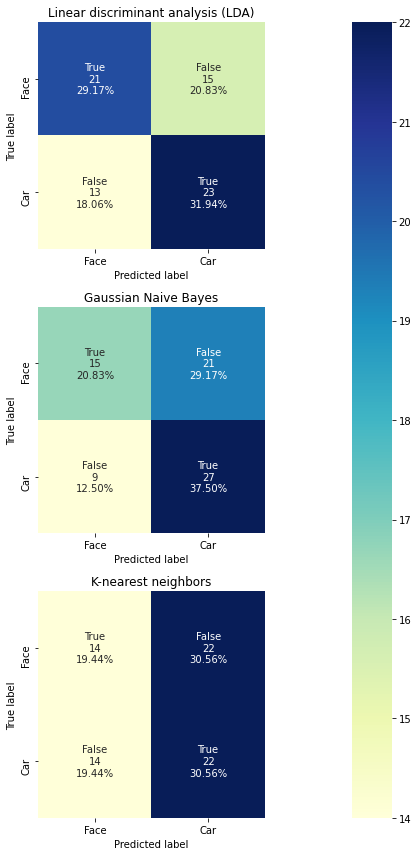

Significance above 0.17
Single iteration LDA Accuracy score:  0.19
Cross validated score (Mean (Std)): 9.82% (11.10%)
Single iteration Gaussian Naive Bayes Accuracy score:  0.19
Cross validated score (Mean (Std)): 20.89% (17.79%)
Single iteration K-nearest neighbors Accuracy score:  0.17
Cross validated score (Mean (Std)): 17.14% (18.95%)


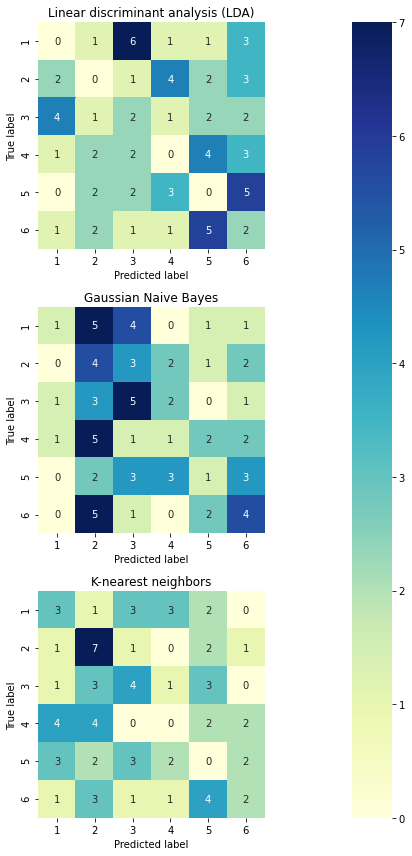

In [36]:
face_car_cross_validation(factor=nntuck, task=facecar)
difficulty_cross_validation(factor=nntuck, task=coherence)

### Produce single-iteration accuracy scores for Face vs Car Discrimination

In [37]:
ranks=[1, 2, 3, 4, 5, 6]

model1=LDA()
model2=GaussianNB()
model3=KNN()

models={model1,model2,model3}

In [87]:
### Single Iteration

task=facecar

Tucker_performance_facecar_LDA=[]
NNTucker_performance_facecar_LDA=[]
PARAFAC_performance_facecar_LDA=[]
NNPARAFAC_performance_facecar_LDA=[]

Tucker_performance_facecar_GNB=[]
NNTucker_performance_facecar_GNB=[]
PARAFAC_performance_facecar_GNB=[]
NNPARAFAC_performance_facecar_GNB=[]

Tucker_performance_facecar_KNN=[]
NNTucker_performance_facecar_KNN=[]
PARAFAC_performance_facecar_KNN=[]
NNPARAFAC_performance_facecar_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt = non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        if model==model1:
            Tucker_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            Tucker_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            Tucker_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))
        
        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
                
        if model==model1:
            NNTucker_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            NNTucker_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            NNTucker_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))
        

        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        if model==model1:     
            PARAFAC_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            PARAFAC_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            PARAFAC_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))

        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        if model==model1:     
            NNPARAFAC_performance_facecar_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            NNPARAFAC_performance_facecar_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            NNPARAFAC_performance_facecar_KNN.append(accuracy_score(y_test,y_pred))

### Produce Single-Iteration Scores for Coherence Discrimination

In [139]:
task = coherence

Tucker_performance_diff_LDA=[]
NNTucker_performance_diff_LDA=[]
PARAFAC_performance_diff_LDA=[]
NNPARAFAC_performance_diff_LDA=[]

Tucker_performance_diff_GNB=[]
NNTucker_performance_diff_GNB=[]
PARAFAC_performance_diff_GNB=[]
NNPARAFAC_performance_diff_GNB=[]

Tucker_performance_diff_KNN=[]
NNTucker_performance_diff_KNN=[]
PARAFAC_performance_diff_KNN=[]
NNPARAFAC_performance_diff_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt =non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        
        if model==model1:
            Tucker_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            Tucker_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            Tucker_performance_diff_KNN.append(accuracy_score(y_test,y_pred))


        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        
        if model==model1:
            NNTucker_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        elif model==model2:
            NNTucker_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        elif model==model3:
            NNTucker_performance_diff_KNN.append(accuracy_score(y_test,y_pred))
        
        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
       
        
        if model==model1:     
            PARAFAC_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            PARAFAC_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            PARAFAC_performance_diff_KNN.append(accuracy_score(y_test,y_pred))

        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

                        
        if model==model1:     
            NNPARAFAC_performance_diff_LDA.append(accuracy_score(y_test,y_pred))
        if model==model2:
            NNPARAFAC_performance_diff_GNB.append(accuracy_score(y_test,y_pred))
        if model==model3:
            NNPARAFAC_performance_diff_KNN.append(accuracy_score(y_test,y_pred))
            
print(*PARAFAC_performance_diff_LDA, sep=' ')
print(*PARAFAC_performance_diff_GNB,sep=' ')
print(*PARAFAC_performance_diff_KNN,sep=' ')

print(*NNPARAFAC_performance_diff_LDA,sep=' ')
print(*NNPARAFAC_performance_diff_GNB,sep=' ')
print(*NNPARAFAC_performance_diff_KNN,sep=' ')

print(*Tucker_performance_diff_LDA,sep=' ')
print(*Tucker_performance_diff_GNB,sep=' ')
print(*Tucker_performance_diff_KNN, sep=' ')

print(*NNTucker_performance_diff_LDA,sep=' ')
print(*NNTucker_performance_diff_GNB,sep=' ')
print(*NNTucker_performance_diff_KNN,sep=' ')

### Produce cross-validated accuracy scores for Face vs Car Discrimination

In [70]:
### Cross-Validated Scores

task=facecar

X_Tucker_performance_facecar_LDA=[]
X_NNTucker_performance_facecar_LDA=[]
X_PARAFAC_performance_facecar_LDA=[]
X_NNPARAFAC_performance_facecar_LDA=[]

X_Tucker_performance_facecar_GNB=[]
X_NNTucker_performance_facecar_GNB=[]
X_PARAFAC_performance_facecar_GNB=[]
X_NNPARAFAC_performance_facecar_GNB=[]

X_Tucker_performance_facecar_KNN=[]
X_NNTucker_performance_facecar_KNN=[]
X_PARAFAC_performance_facecar_KNN=[]
X_NNPARAFAC_performance_facecar_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt = non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=10, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:
            X_Tucker_performance_facecar_LDA.append(results.mean())

        elif model==model2:
            X_Tucker_performance_facecar_GNB.append(results.mean())

        elif model==model3:
            X_Tucker_performance_facecar_KNN.append(results.mean())

        
        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=10, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
                
        if model==model1:
            X_NNTucker_performance_facecar_LDA.append(results.mean())

        elif model==model2:
            X_NNTucker_performance_facecar_GNB.append(results.mean())

        elif model==model3:
            X_NNTucker_performance_facecar_KNN.append(results.mean())


        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=10, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_PARAFAC_performance_facecar_LDA.append(results.mean())

        if model==model2:
            X_PARAFAC_performance_facecar_GNB.append(results.mean())

        if model==model3:
            X_PARAFAC_performance_facecar_KNN.append(results.mean())


        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=10, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_NNPARAFAC_performance_facecar_LDA.append(results.mean())

        if model==model2:
            X_NNPARAFAC_performance_facecar_GNB.append(results.mean())

        if model==model3:
            X_NNPARAFAC_performance_facecar_KNN.append(results.mean())


In [75]:
print(X_PARAFAC_performance_facecar_LDA, sep=' ')
print(X_PARAFAC_performance_facecar_GNB, sep='  ')
print(X_PARAFAC_performance_facecar_KNN, sep=' ')

print(X_NNPARAFAC_performance_facecar_LDA, sep=' ')
print(X_NNPARAFAC_performance_facecar_GNB, sep=' ')
print(X_NNPARAFAC_performance_facecar_KNN, sep=' ')

print(X_Tucker_performance_facecar_LDA, sep=' ')
print(X_Tucker_performance_facecar_GNB, sep=' ')
print(X_Tucker_performance_facecar_KNN, sep=' ')

print(X_NNTucker_performance_facecar_LDA, sep=' ')
print(X_NNTucker_performance_facecar_GNB, sep=' ')
print(X_NNTucker_performance_facecar_KNN, sep=' ')

[0.575, 0.5232142857142857, 0.5678571428571428, 0.5446428571428571, 0.6821428571428572, 0.6928571428571428]
[0.475, 0.6285714285714284, 0.4875, 0.6107142857142857, 0.6267857142857143, 0.5375]
[0.6232142857142857, 0.43035714285714277, 0.38928571428571435, 0.607142857142857, 0.4428571428571428, 0.6142857142857142]
[0.5464285714285714, 0.43928571428571433, 0.5267857142857142, 0.5285714285714286, 0.6303571428571428, 0.5089285714285714]
[0.6125, 0.5696428571428571, 0.5571428571428572, 0.5428571428571428, 0.4839285714285714, 0.5142857142857142]
[0.5660714285714286, 0.5285714285714286, 0.4446428571428571, 0.5410714285714285, 0.4553571428571429, 0.5732142857142857]
[0.6642857142857143, 0.6160714285714286, 0.5821428571428571, 0.6125, 0.6500000000000001, 0.6410714285714285]
[0.5607142857142857, 0.6821428571428572, 0.6660714285714285, 0.6375, 0.6535714285714286, 0.5428571428571428]
[0.4749999999999999, 0.6, 0.6285714285714286, 0.49821428571428567, 0.49821428571428567, 0.48392857142857143]
[0.5982

### Produce Cross-Validated Scores for Coherence discrimination

In [68]:
task = coherence

X_Tucker_performance_diff_LDA=[]
X_NNTucker_performance_diff_LDA=[]
X_PARAFAC_performance_diff_LDA=[]
X_NNPARAFAC_performance_diff_LDA=[]

X_Tucker_performance_diff_GNB=[]
X_NNTucker_performance_diff_GNB=[]
X_PARAFAC_performance_diff_GNB=[]
X_NNPARAFAC_performance_diff_GNB=[]

X_Tucker_performance_diff_KNN=[]
X_NNTucker_performance_diff_KNN=[]
X_PARAFAC_performance_diff_KNN=[]
X_NNPARAFAC_performance_diff_KNN=[]

for i in ranks:
    core, factors_tuck = tucker(X_tensor ,rank=[i,i,i])
    core, factors_nnt =non_negative_tucker(X_tensor ,rank=[i,i,i])
    factors_nnpara = non_negative_parafac(X_tensor ,rank=i)
    factors_para = parafac(X_tensor ,rank=i)
    
    for model in models:
        
        X_train, X_test, y_train, y_test=train_test_split(factors_tuck[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:
            X_Tucker_performance_diff_LDA.append(results.mean())

        elif model==model2:
            X_Tucker_performance_diff_GNB.append(results.mean())

        elif model==model3:
            X_Tucker_performance_diff_KNN.append(results.mean())

        
        X_train, X_test, y_train, y_test=train_test_split(factors_nnt[0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
                
        if model==model1:
            X_NNTucker_performance_diff_LDA.append(results.mean())

        elif model==model2:
            X_NNTucker_performance_diff_GNB.append(results.mean())

        elif model==model3:
            X_NNTucker_performance_diff_KNN.append(results.mean())


        X_train, X_test, y_train, y_test=train_test_split(factors_para[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_PARAFAC_performance_diff_LDA.append(results.mean())

        if model==model2:
            X_PARAFAC_performance_diff_GNB.append(results.mean())

        if model==model3:
            X_PARAFAC_performance_diff_KNN.append(results.mean())


        X_train, X_test, y_train, y_test=train_test_split(factors_nnpara[1][0],task,train_size=0.85,stratify=task)
        kfold = KFold(n_splits=50, shuffle=True)
        results = cross_val_score(model, X_test, y_test, cv=kfold)
        
        if model==model1:     
            X_NNPARAFAC_performance_diff_LDA.append(results.mean())

        if model==model2:
            X_NNPARAFAC_performance_diff_GNB.append(results.mean())

        if model==model3:
            X_NNPARAFAC_performance_diff_KNN.append(results.mean())

In [69]:
print(*X_PARAFAC_performance_diff_LDA, sep=' ')
print(*X_PARAFAC_performance_diff_GNB, sep=' ')
print(*X_PARAFAC_performance_diff_KNN, sep=' ')

print(*X_NNPARAFAC_performance_diff_LDA, sep=' ')
print(*X_NNPARAFAC_performance_diff_GNB, sep=' ')
print(*X_NNPARAFAC_performance_diff_KNN, sep=' ')

print(*X_Tucker_performance_diff_LDA, sep=' ')
print(*X_Tucker_performance_diff_GNB, sep=' ')
print(*X_Tucker_performance_diff_KNN, sep=' ')

print(*X_NNTucker_performance_diff_LDA, sep=' ')
print(*X_NNTucker_performance_diff_GNB, sep=' ')
print(*X_NNTucker_performance_diff_KNN, sep=' ')

0.18 0.2 0.1 0.22 0.19 0.2
0.1 0.12 0.24 0.21 0.07 0.24
0.15 0.1 0.1 0.19 0.23 0.25
0.07 0.11 0.09 0.15 0.15 0.3
0.12 0.2 0.27 0.26 0.16 0.3
0.1 0.23 0.15 0.22 0.2 0.3
0.04 0.03 0.1 0.06 0.22 0.27
0.16 0.28 0.29 0.21 0.21 0.22
0.19 0.21 0.11 0.17 0.2 0.18
0.2 0.11 0.29 0.18 0.13 0.24
0.13 0.18 0.1 0.21 0.21 0.3
0.2 0.2 0.15 0.22 0.18 0.24
